In [10]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 6, 3

In [11]:
with open('Compas_SP_TEST_Experiments.pkl', 'rb') as handle:
    GF_Experiments = pickle.load(handle)


In [12]:
true_sp = GF_Experiments['true_sp']
true_sp

0.15769243039732933

In [13]:
#Non_efficient_afa
non_efficient_afa = GF_Experiments['non-efficient_afa']
Exp_non_efficient_afa = non_efficient_afa['experiments']
Exp_non_efficient_afa.groupby(["Experiment"])["Estimated_Group_Fairness"].describe(percentiles=[])

,count,mean,std,min,50%,max
Experiment,,,,,,
1,10.0,0.158818,0.023084,0.116987,0.155982,0.194978
2,10.0,0.160059,0.011458,0.145347,0.156869,0.177253
3,10.0,0.154682,0.005327,0.145347,0.154801,0.163072
4,10.0,0.156071,0.015999,0.127622,0.159527,0.176366
5,10.0,0.154990,0.011424,0.136130,0.153855,0.177962
6,10.0,0.158641,0.009150,0.143575,0.159232,0.173707
7,10.0,0.157805,0.007711,0.148386,0.156995,0.170669
8,10.0,0.155273,0.004302,0.149335,0.155318,0.162629
9,10.0,0.160158,0.006046,0.148104,0.159921,0.168981


In [14]:
AFA_Mean_GF =[Exp_non_efficient_afa[Exp_non_efficient_afa["Experiment"] == i+1]["error"].mean() for i in range(10)]
AFA_std_GF = [Exp_non_efficient_afa[Exp_non_efficient_afa["Experiment"] == i+1]["error"].std() for i in range(10)]
AFA_lower_CI_GF = [AFA_Mean_GF[i] - 1.96* AFA_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
AFA_upper_CI_GF = [AFA_Mean_GF[i] + 1.96* AFA_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]

In [15]:
#efficient_afa
efficient_afa = GF_Experiments['efficient_afa']
Exp_efficient_afa = efficient_afa['experiments']
AFA_efficient_Mean_GF =[Exp_efficient_afa[Exp_efficient_afa["Experiment"] == i+1]["error"].mean() for i in range(10)]
AFA_efficient_std_GF = [Exp_efficient_afa[Exp_efficient_afa["Experiment"] == i+1]["error"].std() for i in range(10)]

AFA_efficient_lower_CI_GF = [AFA_efficient_Mean_GF[i] - 1.96* AFA_efficient_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
AFA_efficient_upper_CI_GF = [AFA_efficient_Mean_GF[i] + 1.96* AFA_efficient_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]


In [16]:
# baseline 1: iid
iid = GF_Experiments['iid']
Exp_iid = iid['experiments']

IID_Mean_GF = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].mean() for i in range(10)]
IID_std_GF = [Exp_iid[Exp_iid["Experiment"] == i+1]["error"].std() for i in range(10)]

IID_lower_CI_GF = [IID_Mean_GF[i] - 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]
IID_upper_CI_GF = [IID_Mean_GF[i] + 1.96* IID_std_GF[i]/math.sqrt(100*(i+1)) for i in range(10)]

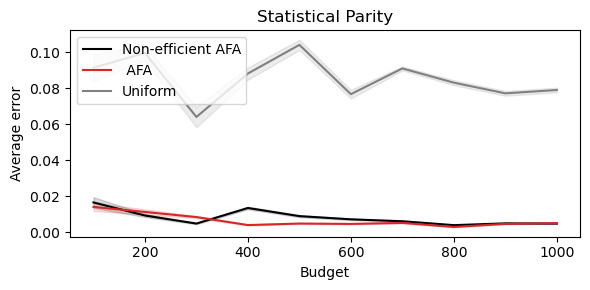

In [17]:
budgets_zhang = [500, 600, 800,900, 1000]
budgets = [100, 200, 300, 400, 500,600,700,800,900,1000]



plt.plot(budgets, AFA_Mean_GF, color = 'black', label="Non-efficient AFA")
plt.fill_between(budgets,AFA_lower_CI_GF, AFA_upper_CI_GF, color = 'black', alpha =.15)

plt.plot(budgets, AFA_efficient_Mean_GF, color = 'C3', label=" AFA")
plt.fill_between(budgets,AFA_efficient_lower_CI_GF, AFA_efficient_upper_CI_GF, color = 'C3', alpha =.15)

plt.plot(budgets, IID_Mean_GF, color = 'grey', label="Uniform")
plt.fill_between(budgets,IID_lower_CI_GF, IID_upper_CI_GF, color = 'grey', alpha =.15)


plt.legend(loc = "upper left")
plt.ylabel("Average error")
plt.xlabel("Budget")
plt.tight_layout()
plt.title('Statistical Parity')
plt.tight_layout()
plt.savefig("GF_RF_final.pdf")
plt.show()

In [18]:
print("Computation time for non efficient AFA is {}".format(GF_Experiments['non-efficient_afa']['computation_sp_afa']))
print("Computation time for efficient AFA is {}".format(GF_Experiments['efficient_afa']['computation_time_eff_afa']))
print("Computation time for  IID is {}".format(GF_Experiments['iid']['computation_sp_iid']))


Computation time for non efficient AFA is 14427.689591407776
Computation time for efficient AFA is 275.6069667339325
Computation time for  IID is 1.0233473777770996


In [47]:
GF_Experiments['non-efficient_afa']['experiments']

,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.155982,0.001710
1,1,2,0.170162,0.012470
2,1,3,0.145347,0.012345
3,1,4,0.148892,0.008800
4,1,5,0.162363,0.004671
...,...,...,...,...
95,10,6,0.165436,0.007743
96,10,7,0.161553,0.003861
97,10,8,0.155096,0.002596
98,10,9,0.164648,0.006955


In [48]:
GF_Experiments['efficient_afa']['experiments']


,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.152437,0.005255
1,1,2,0.194978,0.037285
2,1,3,0.154801,0.002892
3,1,4,0.159527,0.001835
4,1,5,0.165908,0.008216
...,...,...,...,...
95,10,6,0.154210,0.003483
96,10,7,0.159527,0.001835
97,10,8,0.156869,0.000824
98,10,9,0.154801,0.002892


In [49]:
GF_Experiments['iid']['experiments']

,Iteration,Experiment,Estimated_Group_Fairness,error
0,1,1,0.069307,0.088385
1,1,2,0.039801,0.117891
2,1,3,0.129568,0.028124
3,1,4,0.057357,0.100336
4,1,5,0.067864,0.089828
...,...,...,...,...
95,10,6,0.079867,0.077826
96,10,7,0.035663,0.122029
97,10,8,0.062422,0.095270
98,10,9,0.062153,0.095539
